In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('homeprices2.csv')


In [3]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [4]:
dummies=pd.get_dummies(df.town)

In [5]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [6]:
type(dummies)

pandas.core.frame.DataFrame

In [7]:
df2=pd.concat([df,dummies],axis=1)

In [8]:
df2

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [9]:
df2.drop(['town','west windsor'] ,axis=1 ,inplace=True)

In [10]:
df2

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [11]:
x=df2.drop(['price'],axis=1)
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [12]:
y=df2.price


In [13]:
from sklearn import linear_model

In [14]:
model=linear_model.LinearRegression()

In [15]:
model.fit(x,y)

LinearRegression()

In [16]:
model.predict([[3400,0,0]])

c:\users\shivam\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([681241.66845839])

In [17]:
model.predict([[2800,0,1]])

c:\users\shivam\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([590775.63964739])

In [18]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2ac4849ea88>,
 [Text(1.0781365572476307, 0.218223655743887, '550000'),
  Text(0.8889243839316842, 0.6479301194200469, '565000'),
  Text(0.4929798581000371, 0.9833467646296842, '610000'),
  Text(-0.06333448119079124, 1.0981751879788095, '680000'),
  Text(-0.6581288354684861, 0.8814002699823131, '725000'),
  Text(-1.0032897776578715, 0.451009558709368, '585000'),
  Text(-1.0999675498197543, 0.008449221474568013, '615000'),
  Text(-0.9852328541595198, -0.48919957388032, '650000'),
  Text(-0.6027594307156298, -0.920152742039804, '710000'),
  Text(-0.1138609153277499, -1.094091263085821, '575000'),
  Text(0.34473642867129817, -1.044584508188284, '600000'),
  Text(0.7733236108927816, -0.7822854931773628, '620000'),
  Text(1.0582119611277743, -0.3003122463805135, '695000')])

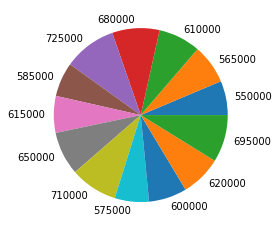

In [19]:
plt.pie(df.area,labels=df.price)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
dfL=df

In [23]:
dfL.town=le.fit_transform(dfL.town)

In [24]:
dfL

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [34]:
x=dfL[['town','area']].values
y=dfL.price

In [37]:
from sklearn.preprocessing import OneHotEncoder